In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import joblib
from astropy.table import Table
from pyrafspec.fitslist import load_multispec, specwcs, MultiSpecItem
from pyrafspec.readirafmultispec import readmultispec
import os

# make lamp template

- fname_templatelate calibrated by iraf

In [48]:
fname_template = '../data/KECKHIRS/lamp-j3640014-ihdu-1_1d.fits'
lampirafdic = readmultispec(fname_template, reform=False)

Dispersion is order-5 Chebyshev polynomial
Correcting for redshift: z=0.000000


In [3]:
#lampirafdic['wavelen']

In [49]:
#dump_obj = joblib.load('../data/P200DBSP/star-blue0059.fits.dump')
#dump_obj = joblib.load('/home/sdb216/sdOBdata/Documents/Feige64/data/spec/feige64_spec_all_20230210/P200feige64DATA-tolijiao/dump/star-blue0059.fits.dump')
#dump_lamp = joblib.load('../data/P200DBSP/lamp-blue0062.fits.dump')
dump_lamp = joblib.load('/home/sdb216/sdOBdata/Documents/Feige64/data/spec/KECK/dump/lamp-j3640016.fits-ihdu-1.dump')
#dump_obj['blaze_norm'] = np.array([ _/np.median(_) for _ in dump_obj['blaze'] ])

In [7]:
#wave, flux,fluxerr = read_p200_spec(fname_obj)

Text(0, 0.5, 'Flux/median')

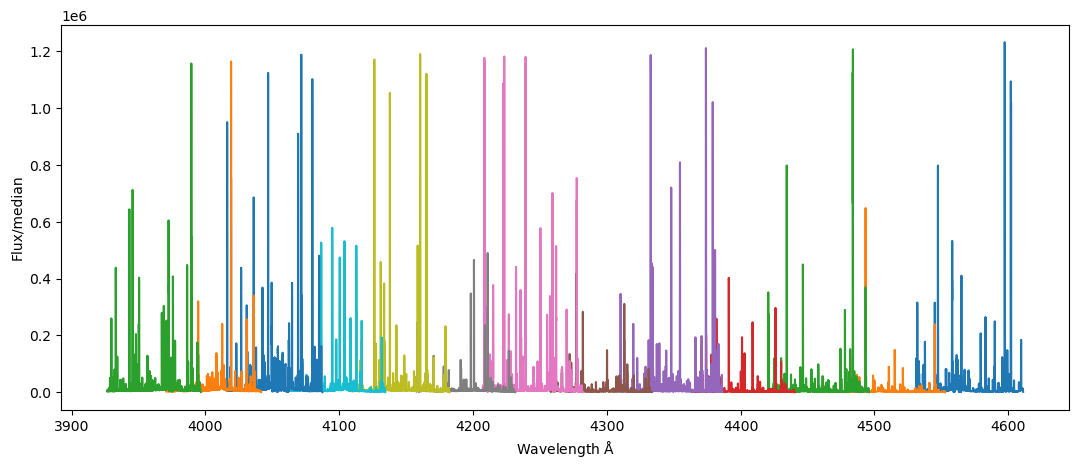

In [8]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
#plt.plot(wave, flux/np.median(flux), label='iraf')

plt.plot(lampirafdic['wavelen'].T,lampirafdic['flux'].T)

#_flux =( dump_obj['spec_extr']/dump_obj['blaze_norm'])[0]
#plt.plot(lampirafdic['wavelen'][0],_flux/np.median(_flux), label='pyexspec')

plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')

In [3]:
linelist = np.loadtxt('../data/KECKHIRS/thar.dat')

In [10]:
lampirafdic['wavelen']

array([[4530.95849006, 4530.97963573, 4531.00078092, ..., 4611.03276926,
        4611.05049034, 4611.06821019],
       [4473.56310386, 4473.58400061, 4473.60489691, ..., 4552.72071659,
        4552.73823412, 4552.75575044],
       [4417.60542757, 4417.62608123, 4417.64673445, ..., 4495.86360367,
        4495.8809218 , 4495.89823874],
       ...,
       [4015.82003391, 4015.83892841, 4015.85782252, ..., 4087.43250484,
        4087.44836045, 4087.46421498],
       [3970.6870357 , 3970.7057309 , 3970.72442571, ..., 4041.52979524,
        4041.54548275, 4041.56116919],
       [3926.55950435, 3926.57800432, 3926.5965039 , ..., 3996.64460224,
        3996.66012455, 3996.67564581]])

# save the lamp (FEAR arc for DBSP) template

In [52]:
thar_template = {}
thar_template['wave'] = lampirafdic['wavelen']#[:, 4:4000]
thar_template['flux'] = dump_lamp['lamp1d']#lampirafdic['flux'][:, 4:4000]#dump_lamp['lamp1d']
thar_template['linelist'] = linelist
#joblib.dump(thar_template, '../KECKHIRES/template/thar_template_ihdu-1.z')

In [46]:
def plotline(x, y, stri=None, dy=0.15, sy=0.35, scolor='b', dcolor='b', rotation='90'):
    plt.plot([x, x], [y, y+dy], color=dcolor, lw=1)
    if stri is not None:
      plt.text(x, y+sy, stri, color=scolor, ha='center', va='center', rotation=rotation)

In [54]:
dump_lamp['wave_solu']

array([[4531.0170383 , 4531.03814959, 4531.05926047, ..., 4609.77523008,
        4609.79308942, 4609.81094762],
       [4473.642317  , 4473.66319597, 4473.68407453, ..., 4551.49463269,
        4551.51225508, 4551.52987631],
       [4417.68843863, 4417.70908756, 4417.72973608, ..., 4494.6537707 ,
        4494.67117357, 4494.68857528],
       ...,
       [4015.88568117, 4015.904577  , 4015.92347244, ..., 4086.30375373,
        4086.31964884, 4086.33554285],
       [3970.7236107 , 3970.74229895, 3970.76098686, ..., 4040.37541209,
        4040.39110238, 4040.40679158],
       [3926.53887683, 3926.55736022, 3926.57584332, ..., 3995.43233957,
        3995.4478109 , 3995.46328111]])

Text(0, 0.5, 'Flux/median')

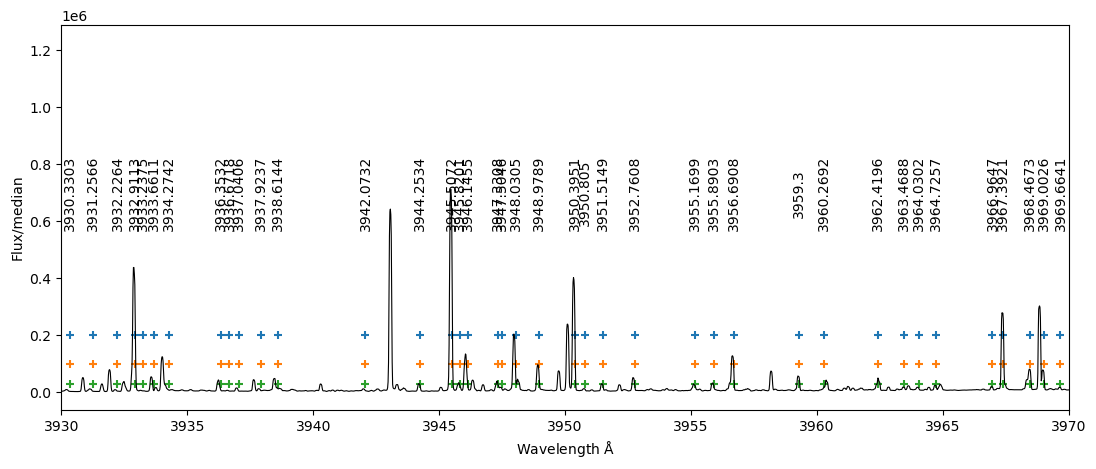

In [56]:

#flux_fear = dump_lamp['lamp1d'][0]
fig, ax = plt.subplots(1,1,figsize=(13,5))
#plt.plot(thar_template['wave'].T, thar_template['flux'].T)


#plt.plot(dump_lamp['wave_solu'].T, dump_lamp['lamp1d'].T, lw=0.8)
for _i, _wave in enumerate(dump_lamp['wave_solu']):
    color ='k' if np.mod(_i, 2) == 0 else 'b'
    plt.plot(_wave, dump_lamp['lamp1d'][_i], color=color, lw=0.8 )
#plt.plot(dump_lamp['wave_solu'][0], dump_lamp['lamp1d'][0], label='pyexspec')
_ind = (linelist > np.min(dump_lamp['wave_solu'])) & (linelist < np.max(dump_lamp['wave_solu']))
_linelist = linelist[_ind]
plt.scatter(_linelist, np.ones(len(_linelist))*200000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*100000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*30000, marker='+')


dw = 40
xlim = 3930+dw*0

_indxlim = (linelist >= xlim) & (linelist <=xlim+dw)
for _x in linelist[_indxlim]:
    plt.text(_x, 700000, f'{_x}', ha='center', va='center', rotation=90)


plt.xlim(xlim, xlim+dw)
#plt.ylim(0, 0.4e6)

#plt.legend()
plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')

# check template

Text(0, 0.5, 'Flux/median')

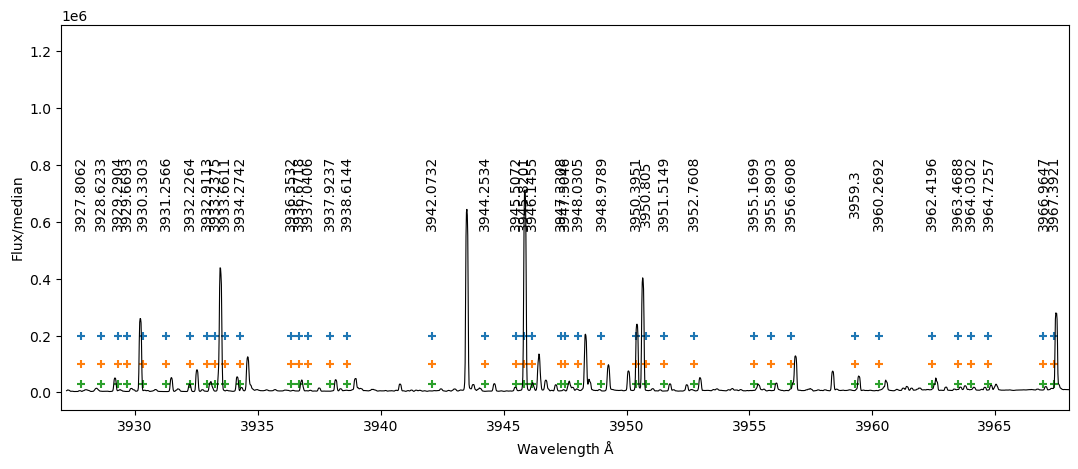

In [53]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
for _i, _wave in enumerate(thar_template['wave']):
    color ='k' if np.mod(_i, 2) == 0 else 'b'
    _flux = thar_template['flux'][_i]
    plt.plot(_wave, _flux, color=color, lw=0.8 )
#plt.plot(dump_lamp['wave_solu'][0], dump_lamp['lamp1d'][0], label='pyexspec')
_ind = (linelist > np.min(thar_template['wave'])) & (linelist < np.max(thar_template['wave']))
_linelist = linelist[_ind]
plt.scatter(_linelist, np.ones(len(_linelist))*200000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*100000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*30000, marker='+')


dw = 41
xlim = 3927+dw*0

_indxlim = (linelist >= xlim) & (linelist <=xlim+dw)
for _x in linelist[_indxlim]:
    plt.text(_x, 700000, f'{_x}', ha='center', va='center', rotation=90)


plt.xlim(xlim, xlim+dw)
#plt.ylim(0, 0.4e6)

#plt.legend()
plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')

In [21]:
thar_template['wave'], thar_template['flux']

(array([[4530.73556496, 4530.75693561, 4530.77830541, ..., 4611.1609041 ,
         4611.17920456, 4611.19750435],
        [4473.43052445, 4473.45162774, 4473.47273032, ..., 4552.86570301,
         4552.88354149, 4552.90137906],
        [4417.51819094, 4417.53902918, 4417.55986682, ..., 4495.98591539,
         4496.00334627, 4496.02077608],
        ...,
        [4015.99719598, 4016.01598991, 4016.03478344, ..., 4087.4716394 ,
         4087.48759768, 4087.50355497],
        [3971.03598687, 3971.05453395, 3971.07308057, ..., 4041.72152155,
         4041.7375    , 4041.75347764],
        [3927.13744429, 3927.15574629, 3927.17404775, ..., 3997.05139579,
         3997.06743591, 3997.08347545]]),
 array([[ 856.3136 ,  966.70325, 1071.8798 , ..., 2018.1582 , 1827.3647 ,
         1591.5779 ],
        [ 873.     ,  883.     ,  981.     , ...,  311.     ,  338.     ,
          322.     ],
        [2348.7192 , 2450.3115 , 2368.177  , ...,  422.8794 ,  436.71167,
          353.448  ],
        ...,


# calibrate wavelength by IRAF
- write the follow code into calibrate_wave.py file & python python calibrate_wave.py

# use iraf 
- $cl --> noao --> imred --> echel --> echelle --> ecidentify or dispcor
- edit parameter: epa eci

k
- k --> down to next order 
- j --> up to previous order or (check rms) 
- h --> leave rms 
- d --> delete points 
- m --> mark points 
- f --> fit curve 
- w&e -> 
- - e --> select zone (xaixs invert: right_bottom --> left_top; yaxis_invert: left_top-->right_bottom)
- w&a --> restore image
- q --> quit



# Check the solution of wavelength calibrate

In [277]:
dire = '/home/sdb216/sdOBdata/Documents/Feige64/data/spec/KECK/dump/'
#dire = '/home/sdb216/sdOBdata/Documents/Feige64/data/spec/feige64_spec_all_20230210/KECKDATAfeige64_tolijiao/Feige64_0205_KECK/dump/'
dump_lamp17_ihdu2 = joblib.load(os.path.join(dire, 'lamp-j3640016.fits-ihdu-2.dump'))
dump_lamp17_ihdu1 = joblib.load(os.path.join(dire, 'lamp-j3640016.fits-ihdu-1.dump'))
dump_lamp17_ihdu3 = joblib.load(os.path.join(dire, 'lamp-j3640016.fits-ihdu-3.dump'))

- ihdu 1

Text(0, 0.5, 'Flux/median')

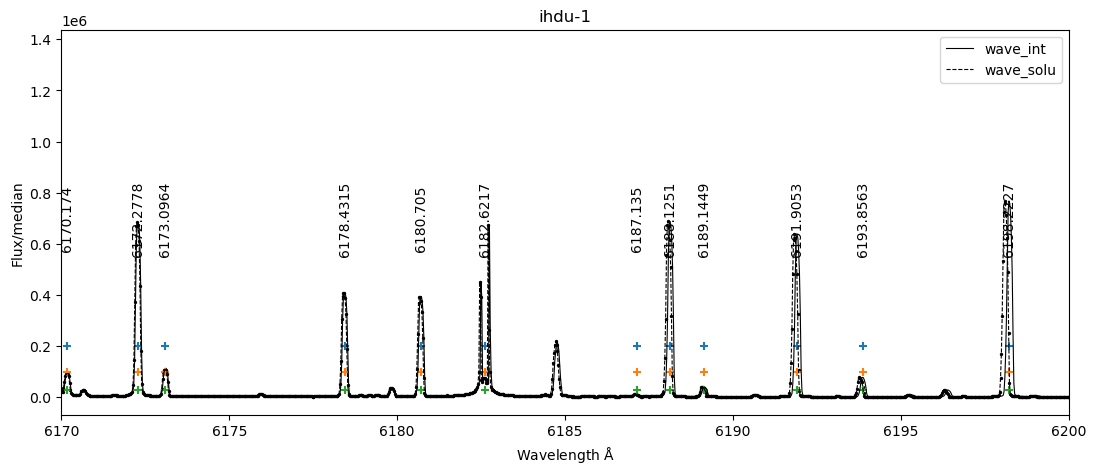

In [278]:
dump_lamp = dump_lamp17_ihdu1
fig, ax = plt.subplots(1,1,figsize=(13,5))
waves = dump_lamp['wave_init']
for _i, _wave in enumerate(waves):
    color ='k' if np.mod(_i, 2) == 0 else 'b'
    _flux = dump_lamp['lamp1d'][_i]
    if _i == 0 : plt.plot(_wave, _flux, color=color, lw=0.8, label='wave_int')
    else: plt.plot(_wave, _flux, color=color, lw=0.8)

    
_waves_solu = dump_lamp['wave_solu']
for _i, _wave in enumerate(_waves_solu):
    color ='k' if np.mod(_i, 2) == 0 else 'b'
    _flux = dump_lamp['lamp1d'][_i]
    if _i == 0 : plt.plot(_wave, _flux, color=color, lw=0.8 , ls='--', label='wave_solu')
    else: plt.plot(_wave, _flux, color=color, lw=0.8 , ls='--')
    plt.scatter(_wave, _flux, color=color, s=2)

#plt.plot(dump_lamp['wave_solu'][0], dump_lamp['lamp1d'][0], label='pyexspec')
_ind = (linelist > np.min(waves)) & (linelist < np.max(waves))
_linelist = linelist[_ind]
plt.scatter(_linelist, np.ones(len(_linelist))*200000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*100000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*30000, marker='+')

plt.title('ihdu-1')
dw = 30
xlim = 4700+dw*49

_indxlim = (linelist >= xlim) & (linelist <=xlim+dw)
for _x in linelist[_indxlim]:
    plt.text(_x, 700000, f'{_x}', ha='center', va='center', rotation=90)


plt.xlim(xlim, xlim+dw)
#plt.ylim(0, 0.4e6)

plt.legend()
plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')

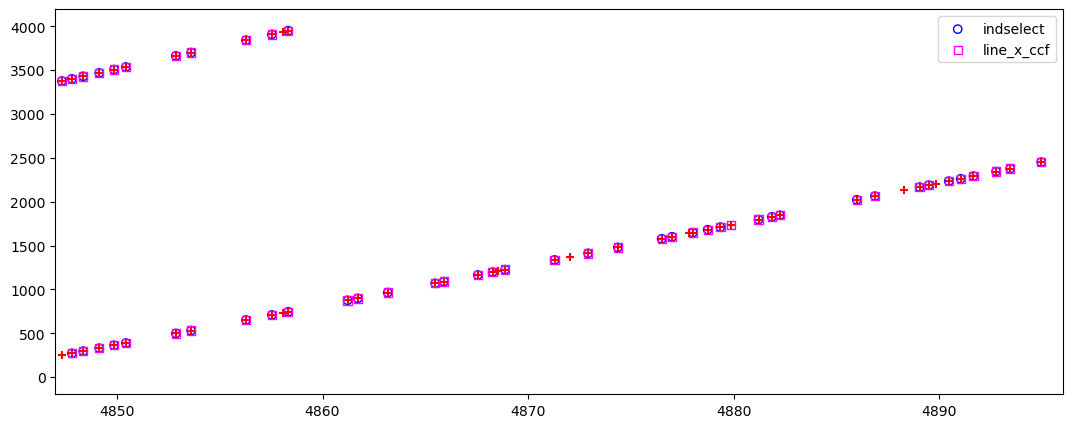

In [279]:
tlines = dump_lamp['tlines']
indselect = tlines['indselect']
fig, ax = plt.subplots(1,1,figsize=(13,5))
plt.scatter(tlines['line'][indselect], tlines['line_x_ccf'][indselect], fc='none', ec='b', label='indselect')
plt.scatter(tlines['line'], tlines['line_x_ccf'], fc='none', ec='magenta', label='line_x_ccf', marker='s')

line_x_init = []
for _wave in waves:
    _line = linelist[(np.min(_wave)<=linelist) & (linelist<=np.max(_wave))]
    _x = np.interp(_line, _wave, np.arange(len(_wave)))
    line_x_init.append(_x)
    plt.scatter(_line, _x, marker='+', color='r')
dw = 49
xlim = 4700+dw*3
plt.xlim(xlim, xlim+dw)
plt.legend()

- ihdu 2

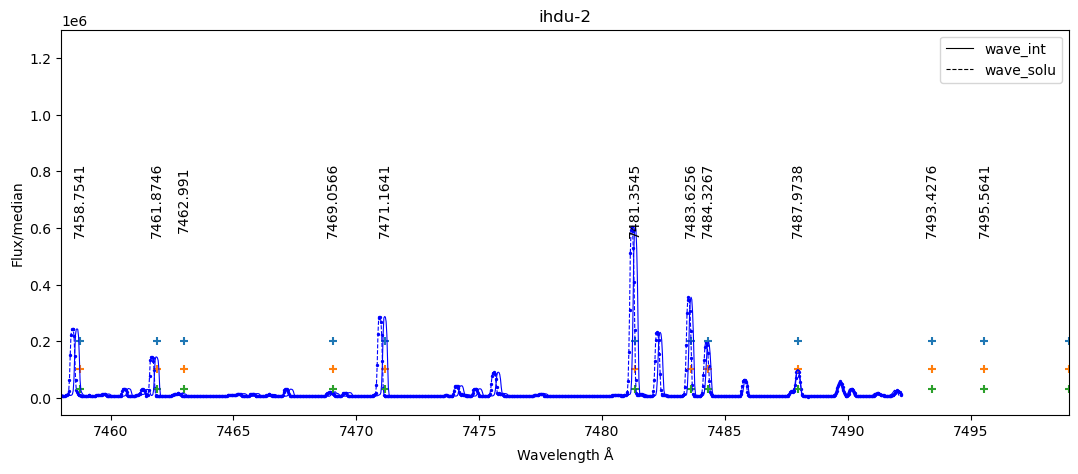

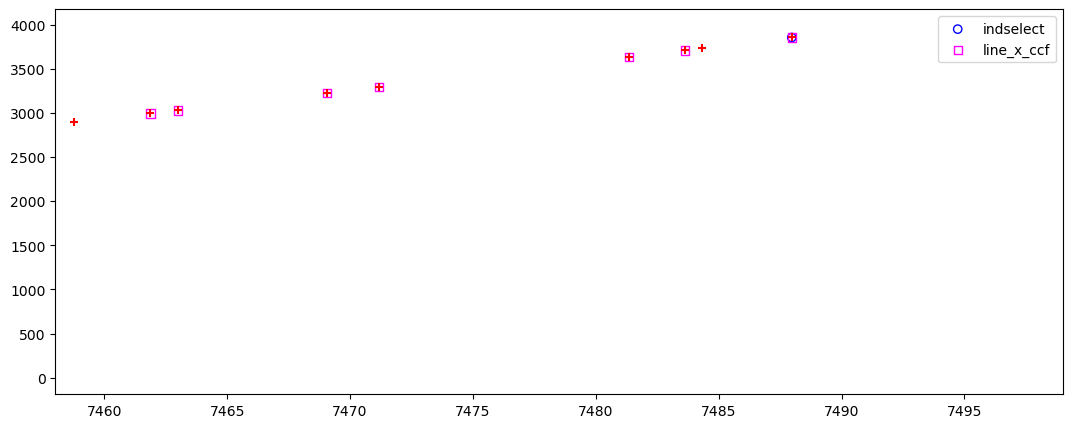

In [263]:
dump_lamp = dump_lamp17_ihdu2.copy()
fig, ax = plt.subplots(1,1,figsize=(13,5))
waves = dump_lamp['wave_init']
for _i, _wave in enumerate(waves):
    color ='k' if np.mod(_i, 2) == 0 else 'b'
    _flux = dump_lamp['lamp1d'][_i]
    if _i == 0 : plt.plot(_wave, _flux, color=color, lw=0.8, label='wave_int')
    else: plt.plot(_wave, _flux, color=color, lw=0.8)

    
_waves_solu = dump_lamp['wave_solu']
for _i, _wave in enumerate(_waves_solu):
    color ='k' if np.mod(_i, 2) == 0 else 'b'
    _flux = dump_lamp['lamp1d'][_i]
    if _i == 0 : plt.plot(_wave, _flux, color=color, lw=0.8 , ls='--', label='wave_solu')
    else: plt.plot(_wave, _flux, color=color, lw=0.8 , ls='--')
    plt.scatter(_wave, _flux, color=color, s=2)
plt.legend()

_ind = (linelist > np.min(dump_lamp['wave_solu'])) & (linelist < np.max(dump_lamp['wave_solu']))
_linelist = linelist[_ind]
plt.scatter(_linelist, np.ones(len(_linelist))*200000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*100000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*30000, marker='+')

plt.title('ihdu-2')
dw = 41
xlim = 6310+dw*28

_indxlim = (linelist >= xlim) & (linelist <=xlim+dw)
for _x in linelist[_indxlim]:
    plt.text(_x, 700000, f'{_x}', ha='center', va='center', rotation=90)


plt.xlim(xlim, xlim+dw)
#plt.ylim(0, 0.4e6)

#plt.legend()
plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')


################################### for selected line##############################
tlines = dump_lamp['tlines']
indselect = tlines['indselect']
fig, ax = plt.subplots(1,1,figsize=(13,5))
plt.scatter(tlines['line'][indselect], tlines['line_x_ccf'][indselect], fc='none', ec='b', label='indselect')
plt.scatter(tlines['line'], tlines['line_x_ccf'], fc='none', ec='magenta', label='line_x_ccf', marker='s')

line_x_init = []
for _wave in waves:
    _line = linelist[(np.min(_wave)<=linelist) & (linelist<=np.max(_wave))]
    _x = np.interp(_line, _wave, np.arange(len(_wave)))
    line_x_init.append(_x)
    plt.scatter(_line, _x, marker='+', color='r')
plt.xlim(xlim, xlim+dw)
plt.legend()

- ihdu3

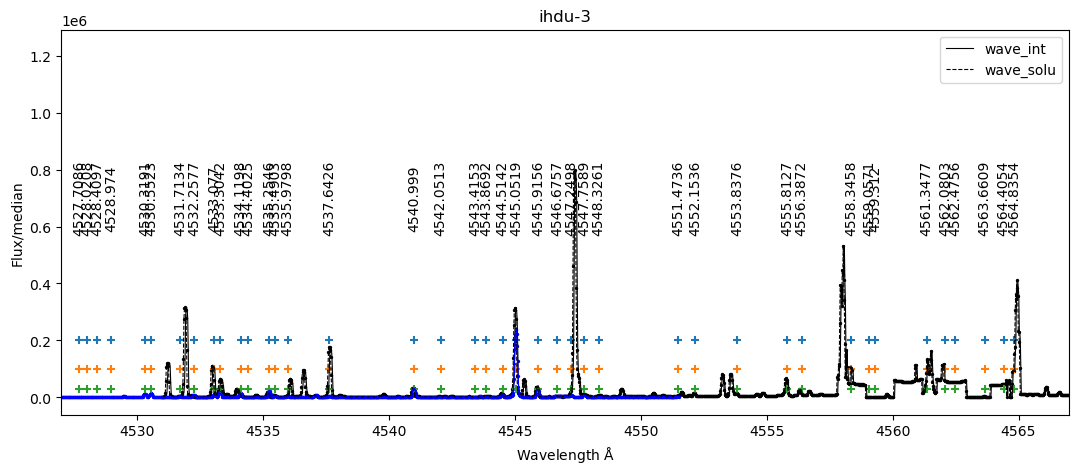

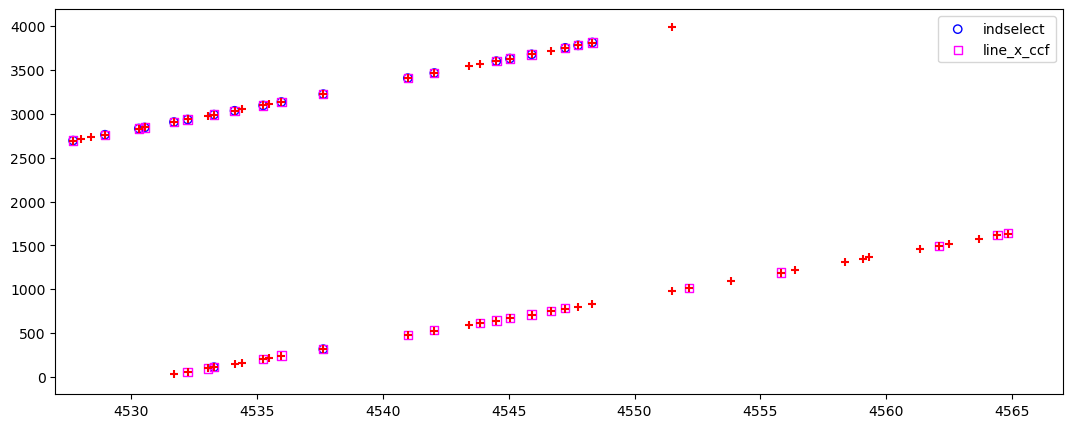

In [276]:
dump_lamp = dump_lamp17_ihdu3
fig, ax = plt.subplots(1,1,figsize=(13,5))
waves = dump_lamp['wave_init']
for _i, _wave in enumerate(waves):
    color ='k' if np.mod(_i, 2) == 0 else 'b'
    _flux = dump_lamp['lamp1d'][_i]
    if _i == 0 : plt.plot(_wave, _flux, color=color, lw=0.8, label='wave_int')
    else: plt.plot(_wave, _flux, color=color, lw=0.8)

    
_waves_solu = dump_lamp['wave_solu']
for _i, _wave in enumerate(_waves_solu):
    color ='k' if np.mod(_i, 2) == 0 else 'b'
    _flux = dump_lamp['lamp1d'][_i]
    if _i == 0 : plt.plot(_wave, _flux, color=color, lw=0.8 , ls='--', label='wave_solu')
    else: plt.plot(_wave, _flux, color=color, lw=0.8 , ls='--')
    plt.scatter(_wave, _flux, color=color, s=2)

#plt.plot(dump_lamp['wave_solu'][0], dump_lamp['lamp1d'][0], label='pyexspec')
_ind = (linelist > np.min(waves)) & (linelist < np.max(waves))
_linelist = linelist[_ind]
plt.scatter(_linelist, np.ones(len(_linelist))*200000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*100000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*30000, marker='+')

plt.title('ihdu-3')
dw = 40
xlim = 3927+dw*15

_indxlim = (linelist >= xlim) & (linelist <=xlim+dw)
for _x in linelist[_indxlim]:
    plt.text(_x, 700000, f'{_x}', ha='center', va='center', rotation=90)


plt.xlim(xlim, xlim+dw)
#plt.ylim(0, 0.4e6)

plt.legend()
plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')


################################### for selected line##############################
tlines = dump_lamp['tlines']
indselect = tlines['indselect']
fig, ax = plt.subplots(1,1,figsize=(13,5))
plt.scatter(tlines['line'][indselect], tlines['line_x_ccf'][indselect], fc='none', ec='b', label='indselect')
plt.scatter(tlines['line'], tlines['line_x_ccf'], fc='none', ec='magenta', label='line_x_ccf', marker='s')

line_x_init = []
for _wave in waves:
    _line = linelist[(np.min(_wave)<=linelist) & (linelist<=np.max(_wave))]
    _x = np.interp(_line, _wave, np.arange(len(_wave)))
    line_x_init.append(_x)
    plt.scatter(_line, _x, marker='+', color='r')
plt.xlim(xlim, xlim+dw)
plt.legend()

In [142]:
# Check template from iraf

Text(0, 0.5, 'Flux/median')

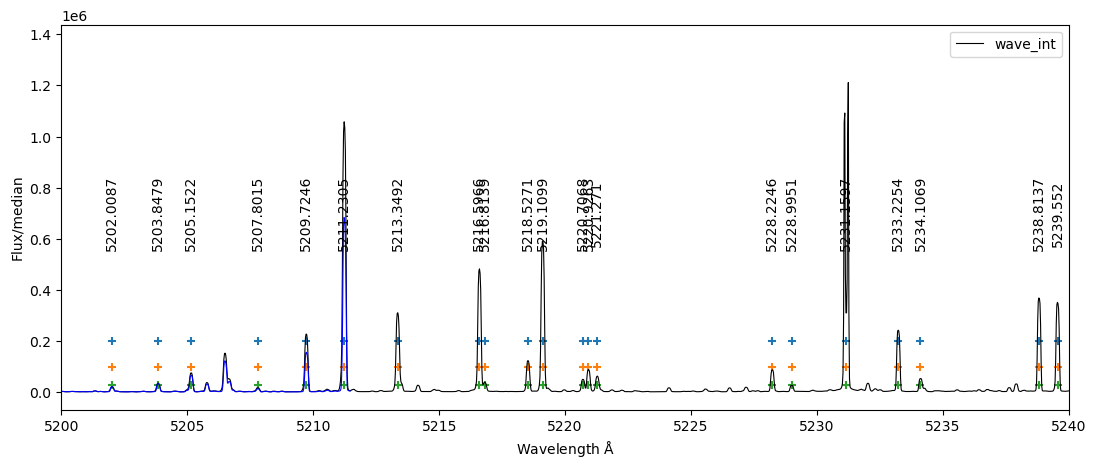

In [78]:
#fname_template = '../data/KECKHIRS/lamp-j3640016-ihdu-3_1d.fits'
#lampirafdic = readmultispec(fname_template, reform=False)
#dump_lamp = dump_lamp17_ihdu3
thar_template = joblib.load('../KECKHIRES/template/thar_template_ihdu-1.z')
fig, ax = plt.subplots(1,1,figsize=(13,5))
waves = thar_template['wave']#lampirafdic['wavelen']
fluxs = thar_template['flux']#lampirafdic['flux']
for _i, _wave in enumerate(waves):
    color ='k' if np.mod(_i, 2) == 0 else 'b'
    _flux = fluxs[_i]
    if _i == 0 : plt.plot(_wave, _flux, color=color, lw=0.8, label='wave_int')
    else: plt.plot(_wave, _flux, color=color, lw=0.8)


#plt.plot(dump_lamp['wave_solu'][0], dump_lamp['lamp1d'][0], label='pyexspec')
_ind = (linelist > np.min(waves)) & (linelist < np.max(waves))
_linelist = linelist[_ind]
plt.scatter(_linelist, np.ones(len(_linelist))*200000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*100000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*30000, marker='+')


dw = 40
xlim = 4720+dw*12

_indxlim = (linelist >= xlim) & (linelist <=xlim+dw)
for _x in linelist[_indxlim]:
    plt.text(_x, 700000, f'{_x}', ha='center', va='center', rotation=90)


plt.xlim(xlim, xlim+dw)
#plt.ylim(0, 0.4e6)

plt.legend()
plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')

In [123]:
pwd

'/share/data/lijiao/Documents/pyexspec/ipynb'